In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
train_data = 'fixDataset/train'
valid_data = 'fixDataset/val'
test_data = 'fixDataset/test'


In [16]:
os.listdir(train_data)

['Broccoli',
 'dagingAyam',
 'dagingSapi',
 'KembangKol',
 'Kentang',
 'Kubis',
 'Labu',
 'Lobak',
 'Paprika',
 'Pare',
 'Telur',
 'Terung',
 'Timun',
 'Tomato',
 'Wortel']

**Augmentasi Gambar**

In [17]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    # rotation_range=0.45,
                    # width_shift_range=0.2,
                    # height_shift_range=0.2,
                    # brightness_range=(0.5,1.0),
                    # shear_range=0.2,
                    # zoom_range=(0.8,1.0),
                    # fill_mode='nearest',
                    # horizontal_flip=True
                    )
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [19]:
#Augmentasi buat dagingAyam, dagingSapi, Telur
# Jangan di Run lagi kalau ngk butuh
# input_dir = '/content/drive/MyDrive/fixDataset/train/Telur'
# output_dir = '/content/drive/MyDrive/fixDataset/train/Telur'

# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for filename in os.listdir(input_dir):
#     img_path = os.path.join(input_dir, filename)
#     img = load_img(img_path)
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     i = 0
#     for batch in train_datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
#         i += 1
#         if i >= 2:  # Jumlah gambar yang ingin dihasilkan
#             break


In [20]:
train_generator = train_datagen.flow_from_directory(
    train_data, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    valid_data,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 16231 images belonging to 15 classes.
Found 2536 images belonging to 15 classes.
Found 2657 images belonging to 15 classes.


In [21]:
image, label = train_generator.next()

In [22]:
class_indices = train_generator.class_indices
class_names = sorted(class_indices, key=class_indices.get)

In [23]:
class_names

['Broccoli',
 'KembangKol',
 'Kentang',
 'Kubis',
 'Labu',
 'Lobak',
 'Paprika',
 'Pare',
 'Telur',
 'Terung',
 'Timun',
 'Tomato',
 'Wortel',
 'dagingAyam',
 'dagingSapi']

In [17]:
class_names

{'Broccoli': 0,
 'KembangKol': 1,
 'Kentang': 2,
 'Kubis': 3,
 'Labu': 4,
 'Lobak': 5,
 'Paprika': 6,
 'Pare': 7,
 'Telur': 8,
 'Terung': 9,
 'Timun': 10,
 'Tomato': 11,
 'Wortel': 12,
 'dagingAyam': 13,
 'dagingSapi': 14}

Trasnfer **Learning**

In [ ]:
from keras.callbacks import EarlyStopping

monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=2)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience= 2,
    verbose= 1,
    factor=0.3,
    min_lr=0.000001
)

In [ ]:
from tensorflow.keras.applications import InceptionV3
input_shape = (150, 150, 3)

# Model InceptionV3
base_model = InceptionV3(weights='imagenet',
                         include_top=False,
                         input_shape=input_shape)
base_model.trainable = False

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

In [ ]:
# Model klasifikasi
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))  # Sesuaikan jumlah kelas di sini

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),  # Menggunakan optimizer Adam tanpa penyesuaian lr
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              18875392  
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 15)                15375     
                                                                 
Total params: 40693551 (155.23 MB)
Trainable params: 18890767 (72.06 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
# import os
# import cv2

# def is_valid_image(image_path, expected_dimensions=(150, 150, 3)):
#     # Fungsi ini memeriksa apakah dimensi gambar sesuai dengan yang diharapkan
#     img = cv2.imread(image_path)

#     # Periksa dimensi dan jumlah channel
#     height, width, channels = img.shape

#     print(f"Tinggi (Height): {height}")
#     print(f"Lebar (Width): {width}")
#     print(f"Jumlah Channel: {channels}")
#     return img is not None and img.shape == expected_dimensions

# is_valid_image('/content/drive/MyDrive/fixDataset/train/dagingSapi/beef-3464_640.jpg')


Tinggi (Height): 480
Lebar (Width): 640
Jumlah Channel: 3


False

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    shuffle=True,
                    verbose=True,
                    validation_data=val_generator,
                    callbacks=[reduce_lr, monitor_val_acc])

Epoch 1/15
132/508 [======>.......................] - ETA: 49:40 - loss: 4.0554 - accuracy: 0.7332

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


508/508 [==============================] - 4651s 9s/step - loss: 1.4703 - accuracy: 0.8144 - val_loss: 0.1427 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 2/15
508/508 [==============================] - 76s 149ms/step - loss: 0.4350 - accuracy: 0.8746 - val_loss: 0.1257 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 3/15
508/508 [==============================] - 75s 147ms/step - loss: 0.3836 - accuracy: 0.8875 - val_loss: 0.1077 - val_accuracy: 0.9708 - lr: 0.0010
Epoch 4/15
508/508 [==============================] - 78s 153ms/step - loss: 0.3269 - accuracy: 0.9014 - val_loss: 0.1171 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 5/15
508/508 [==============================] - ETA: 0s - loss: 0.3281 - accuracy: 0.9008
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
508/508 [==============================] - 76s 149ms/step - loss: 0.3281 - accuracy: 0.9008 - val_loss: 0.1084 - val_accuracy: 0.9677 - lr: 0.0010


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("loss:", test_loss)
print("acc:", test_acc)

84/84 [==============================] - 667s 8s/step - loss: 0.1477 - accuracy: 0.9616
loss: 0.14769470691680908
acc: 0.9616108536720276


In [ ]:
add_model.save('Model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Visualisasi**

Akurasi Train dan Validation

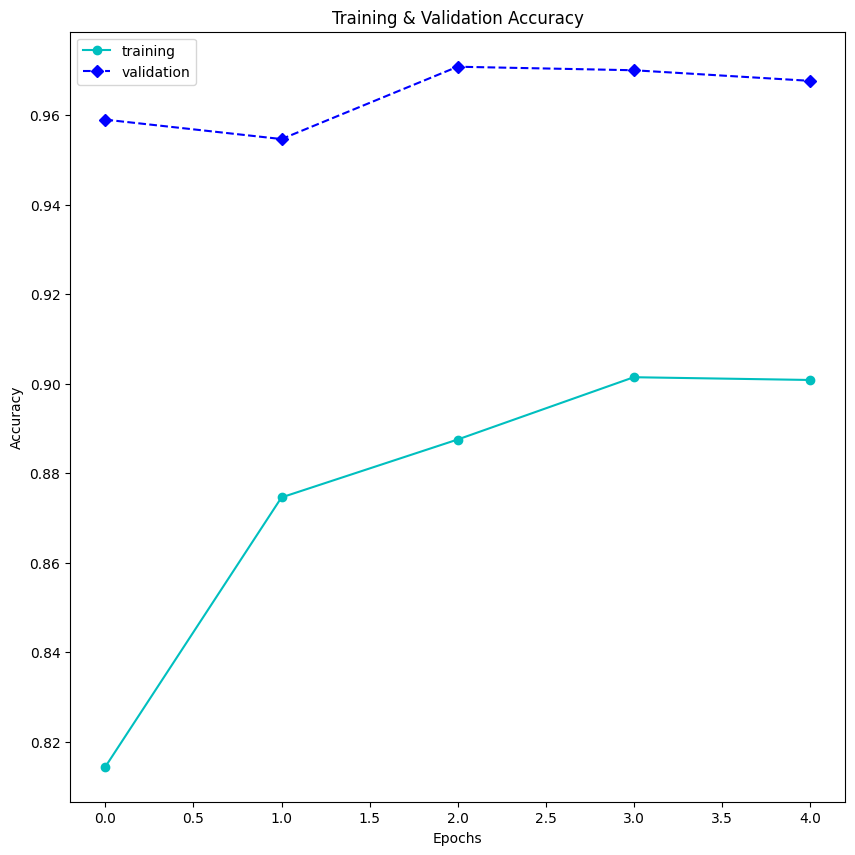

In [ ]:
plt.figure(1, figsize=(10, 10))
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(
    range(len(history.history['val_accuracy'])),
    history.history['val_accuracy'],
    'bD--',
    label='validation'
)
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Visualisasi loss train dan val


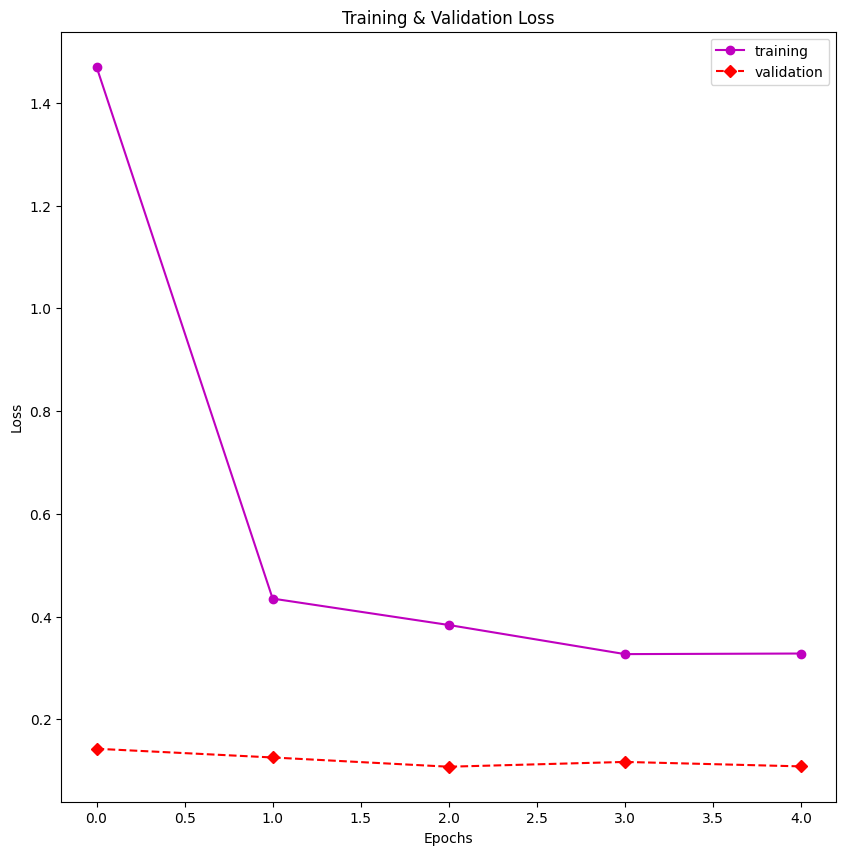

In [ ]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])),
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])),
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Found 2657 images belonging to 15 classes.
1/1 [==============================] - 0s 26ms/step


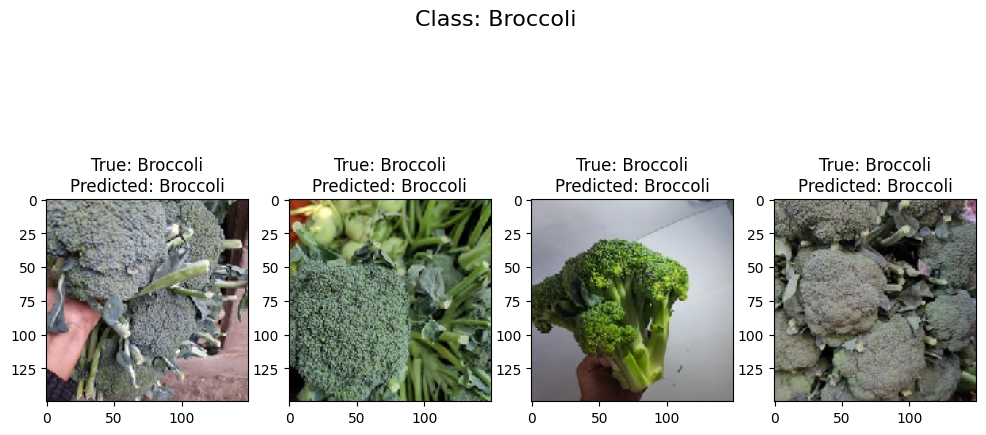

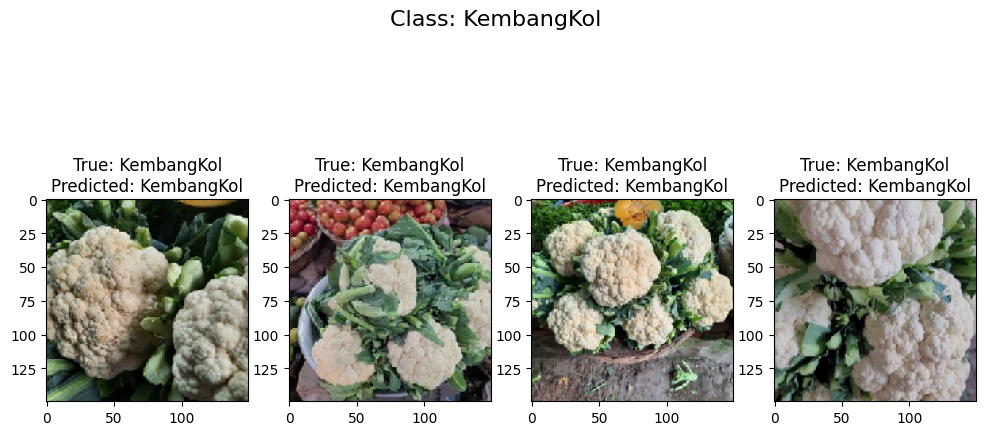

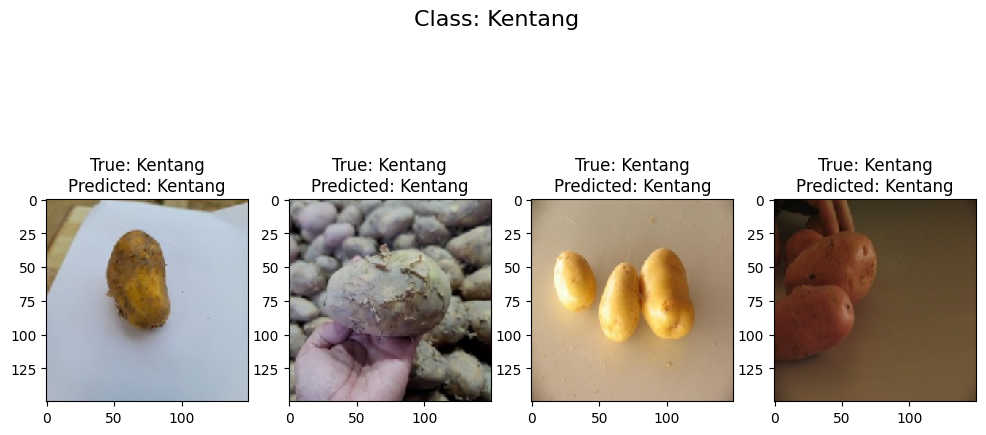

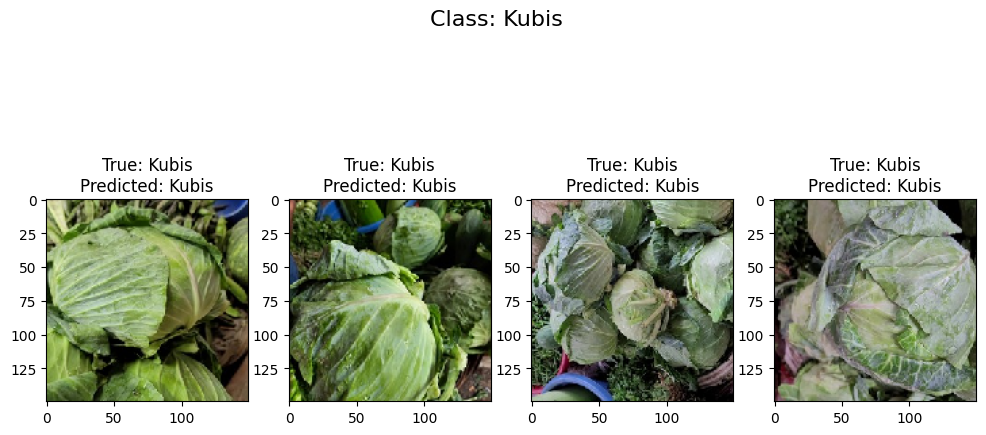

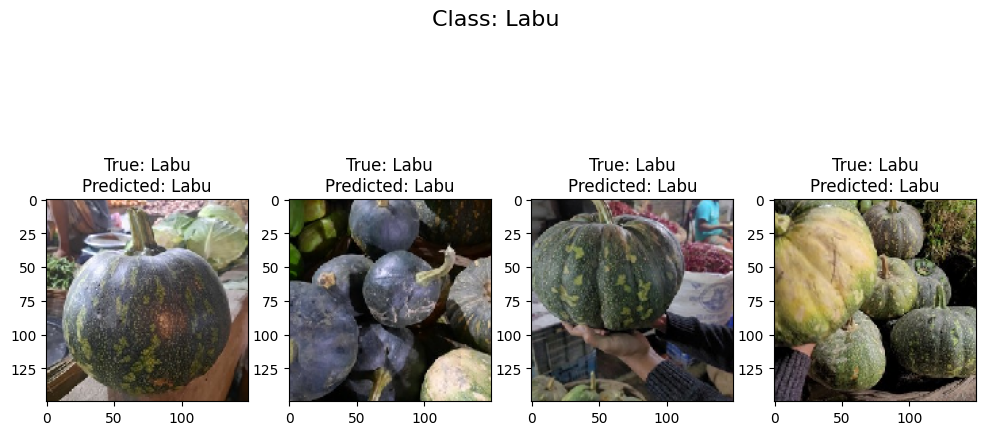

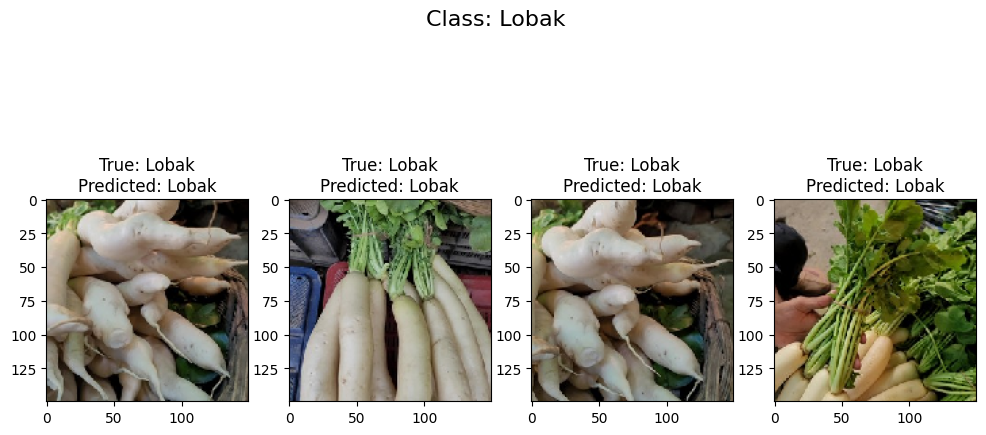

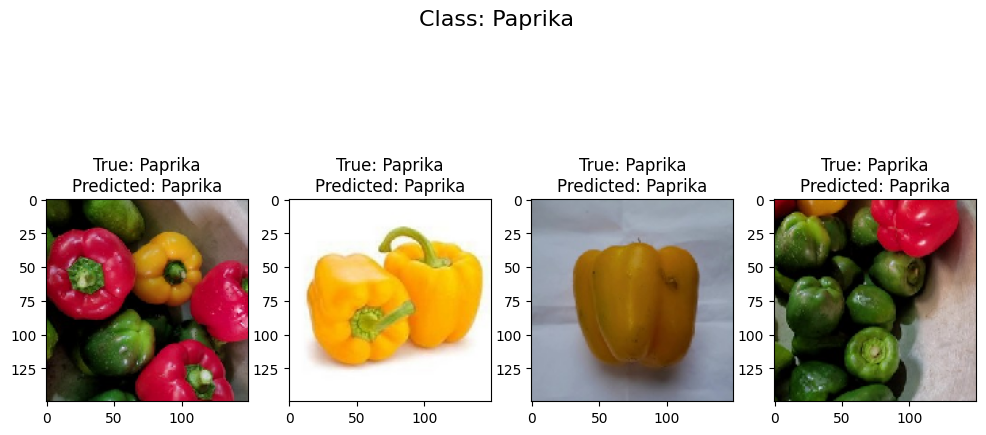

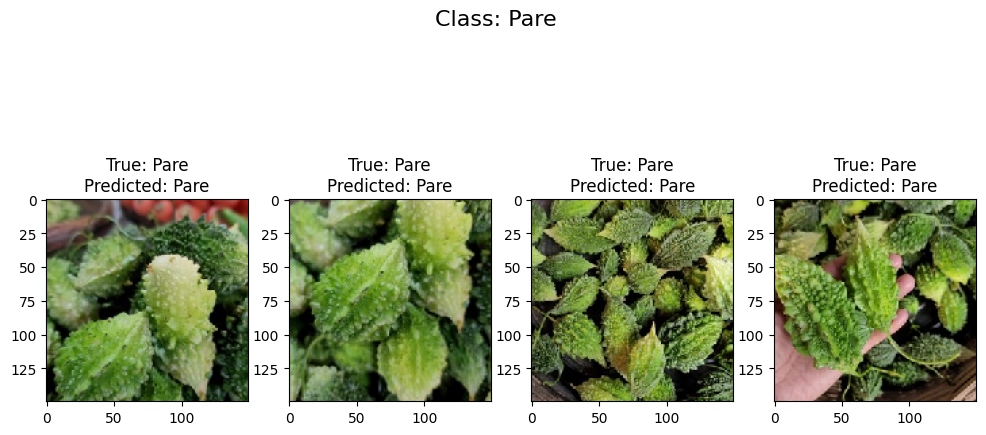

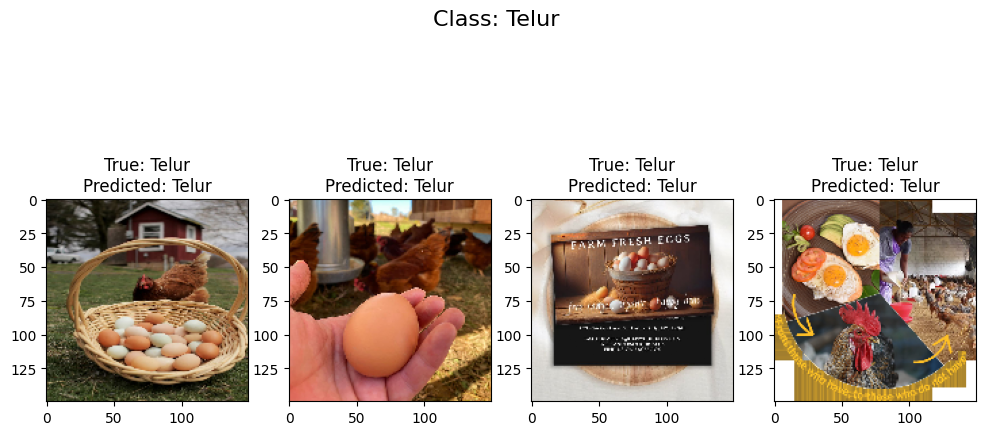

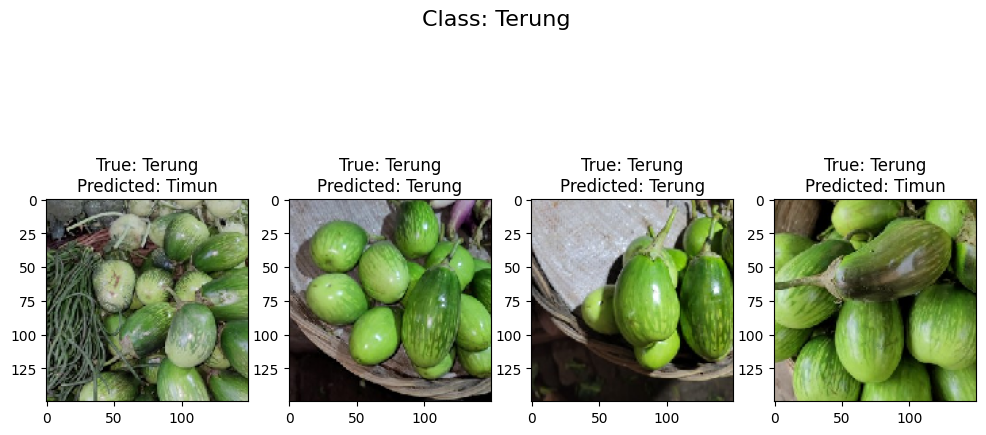

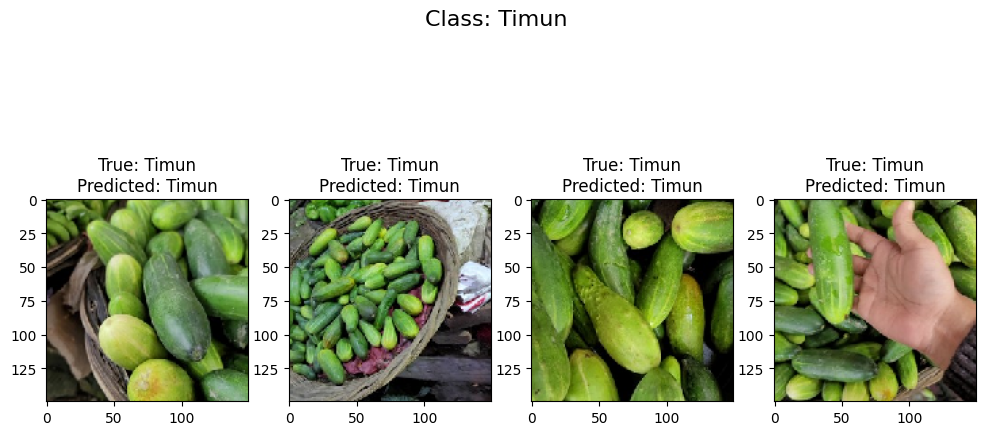

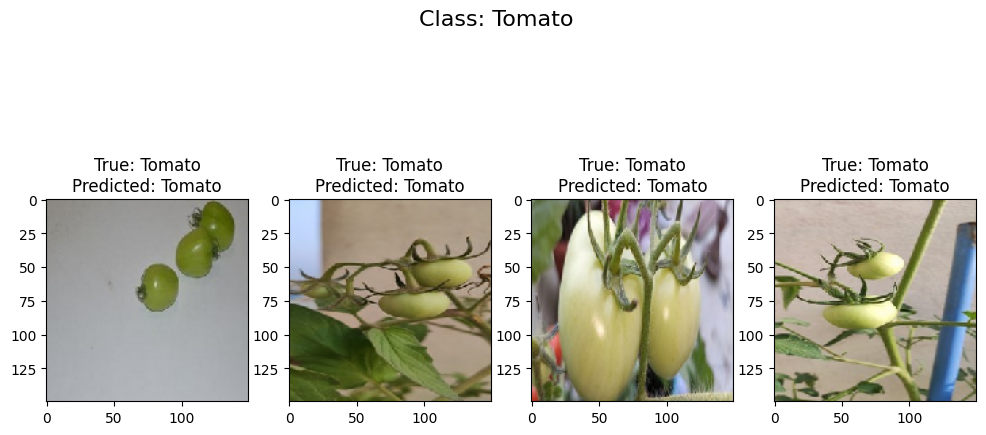

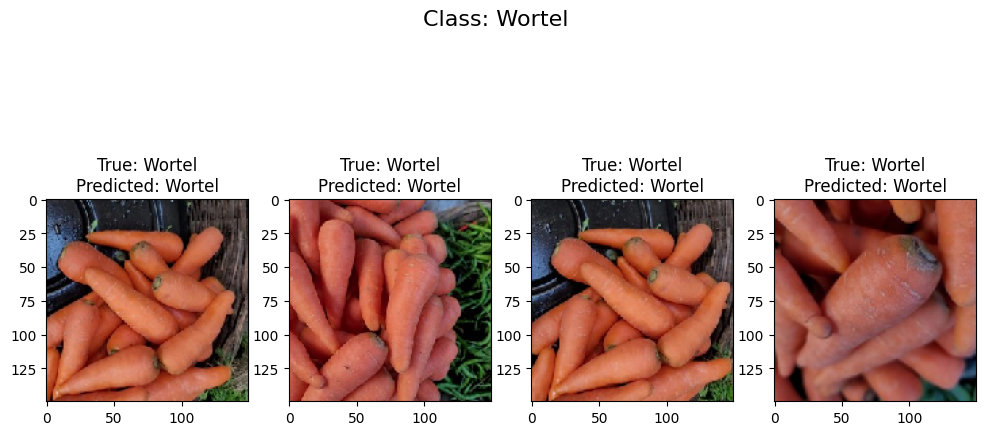

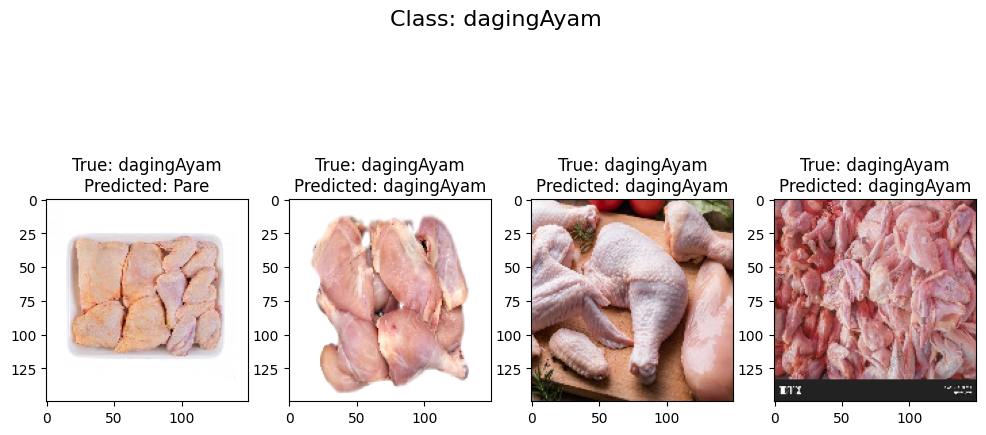

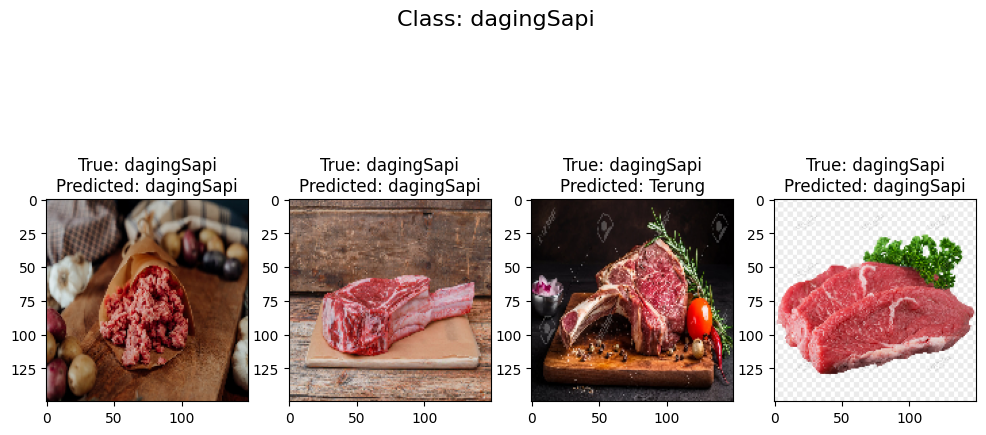

In [ ]:
import numpy as np
import os
# List kelas
class_names = sorted(os.listdir(test_data))

def predict_and_display_samples(model, test_data, class_names, num_samples=4):
    # Ambil generator data test
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_data,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical',
        shuffle=False
    )

    # Membuat daftar kosong untuk setiap kelas
    samples_per_class = {class_name: [] for class_name in class_names}

    for i in range(len(test_generator)):
        if len(samples_per_class) == len(class_names) * num_samples:
            break

        # Ambil satu sampel dari generator
        img, true_label = next(test_generator)
        true_label_idx = np.argmax(true_label[0])

        true_class = class_names[true_label_idx]
        samples = samples_per_class[true_class]

        if len(samples) < num_samples:
            # Lakukan prediksi
            pred = model.predict(img)
            pred_label_idx = np.argmax(pred)
            pred_class = class_names[pred_label_idx]

            samples.append((img[0], true_class, pred_class))

    # Tampilkan sampel
    for class_name, samples in samples_per_class.items():
        plt.figure(figsize=(12, 6))
        plt.suptitle(f"Class: {class_name}", fontsize=16)
        for i, (img, true_label, pred_label) in enumerate(samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(f'True: {true_label}\nPredicted: {pred_label}')

        plt.show()

# Panggil fungsi untuk menampilkan sampel
predict_and_display_samples(model, test_data, class_names, num_samples=4)

['Kentang',
 'Broccoli',
 'dagingSapi',
 'dagingAyam',
 'KembangKol',
 'Telur',
 'Pare',
 'Wortel',
 'Terung',
 'Kubis',
 'Tomato',
 'Timun',
 'Labu',
 'Lobak',
 'Paprika']

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Definisikan callback ModelCheckpoint
checkpoint_path = 'model_checkpoint.h5'
checkpoint = ModelCheckpoint(checkpoint_path,
                              monitor='val_accuracy',  # Menyimpan berdasarkan akurasi pada set validasi
                              save_best_only=True,     # Hanya menyimpan model terbaik
                              mode='max',              # Mode 'max' untuk memaksimalkan metrik pemantauan
                              verbose=1)               # Menampilkan pesan verbose

# Latih model dengan menyertakan callback ModelCheckpoint
history = model.fit(train_generator,
                    epochs=15,
                    shuffle=True,
                    verbose=True,
                    validation_data=val_generator,
                    callbacks=[checkpoint])

Epoch 1/15
  2/508 [..............................] - ETA: 1:07 - loss: 0.1227 - accuracy: 0.9844

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


508/508 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9467
Epoch 1: val_accuracy improved from -inf to 0.98423, saving model to model_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


508/508 [==============================] - 74s 145ms/step - loss: 0.1713 - accuracy: 0.9467 - val_loss: 0.0669 - val_accuracy: 0.9842
Epoch 2/15
508/508 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9632
Epoch 2: val_accuracy improved from 0.98423 to 0.98502, saving model to model_checkpoint.h5
508/508 [==============================] - 78s 153ms/step - loss: 0.1085 - accuracy: 0.9632 - val_loss: 0.0555 - val_accuracy: 0.9850
Epoch 3/15
508/508 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9675
Epoch 3: val_accuracy improved from 0.98502 to 0.98620, saving model to model_checkpoint.h5
508/508 [==============================] - 75s 148ms/step - loss: 0.0968 - accuracy: 0.9675 - val_loss: 0.0609 - val_accuracy: 0.9862
Epoch 4/15
508/508 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9704
Epoch 4: val_accuracy improved from 0.98620 to 0.98778, saving model to model_checkpoint.h5
508/508 [=========================

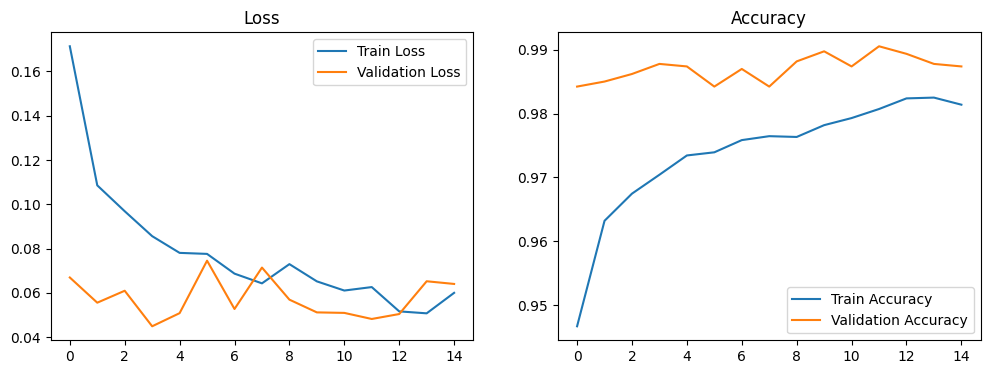

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [21]:
import tensorflow as tf
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/fixDataset/test/dagingAyam/images317.jpg'  # path gambar yang diprediksi
image = Image.open(image_path)
image = image.resize((150, 150))  # Sesuaikan ukuran gambar dengan model yang digunakan

# Preprocess the image
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)  # Gunakan preprocess_input dari InceptionV3
image = tf.expand_dims(image, axis=0)

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_checkpoint.h5')  # path model yang mau dipakai

# predictions
predictions = model.predict(image)
predicted_class = tf.argmax(predictions, axis=1)[0].numpy()

# class labels
class_labels = class_names

# Print predicted class
predicted_label = class_labels[predicted_class]
print('Predicted class:', predicted_label)

1/1 [==============================] - 2s 2s/step
Predicted class: dagingAyam


In [2]:
import tensorflow as tf
import pathlib

model = tf.keras.models.load_model('model_checkpoint.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

print("Conversion successful. TensorFlow Lite model saved to 'converted_model.tflite'")

INFO:tensorflow:Assets written to: C:\Users\Acer\AppData\Local\Temp\tmp771abum1\assets


INFO:tensorflow:Assets written to: C:\Users\Acer\AppData\Local\Temp\tmp771abum1\assets


Conversion successful. TensorFlow Lite model saved to 'converted_model.tflite'


Melakukan Tes TFLite

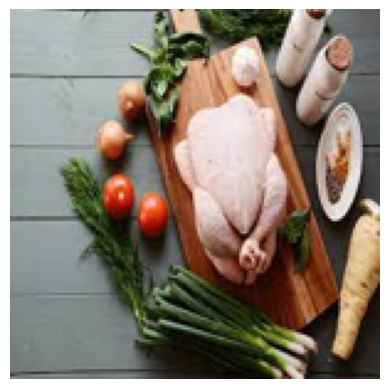

Hasil Capture Gambar: dagingAyam
probabilitas: 0.99999964


In [32]:

from PIL import Image
import matplotlib.pyplot as plt

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_data = 'fixDataset/test/dagingAyam/images317.jpg'
image = Image.open(input_data)
image = image.resize((150, 150))
plt.imshow(image)
plt.axis('off')
plt.show()
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)
image = tf.expand_dims(image, axis=0)

interpreter.set_tensor(input_details[0]['index'], image)

interpreter.invoke()

output = interpreter.get_tensor(output_details[0]['index'])

predicted_class = tf.argmax(output, axis=1)[0].numpy()

class_label = class_names[predicted_class]


# image = Image.open(input_data)
# image = image.resize((150, 150))


print('Hasil Capture Gambar:', class_label)
probability = output[0][predicted_class]
print('probabilitas:', probability)